# Challenge: Klassifikations-Algorithmus für E-Mail-Sortierung

Im vorliegenden Code versuche ich, verschiedene Klassifizierungsmethoden aus dem Machine Learning anzuwenden, um die manuelle Arbeit der Mitarbeiter beim Sortieren von E-Mails zu reduzieren. Zu Beginn werde ich die Daten reinigen und vorbereiten, bevor ich im zweiten Teil die Machine Learning-Methoden anwende und die Ergebnisse dann bewerte.

Ausgewählt habe ich den kleinem Auszug des Datensatzes (etwa 30MB, gezipped 7MB).

## I. Data Processing

In [409]:
import multiprocessing
import seaborn as sns
import email
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [411]:
# Load the CSV file
df = pd.read_csv('emails30MB.csv')
# Rename the columns
df.columns = ['file', 'message']
# Display the first few rows of the dataframe
df.head()

,file,message
0,white-s/discussion_threads/3.,Message-ID: <28919265.1075852042932.JavaMail.e...
1,white-s/discussion_threads/30.,Message-ID: <28555804.1075852043600.JavaMail.e...
2,white-s/discussion_threads/31.,Message-ID: <8369235.1075852043623.JavaMail.ev...
3,white-s/discussion_threads/32.,Message-ID: <1562432.1075852043648.JavaMail.ev...
4,white-s/discussion_threads/33.,Message-ID: <20239053.1075852043671.JavaMail.e...


#### Data Exploration

In [412]:
df.shape

(12274, 2)

In [415]:
print(df.loc[1]['message'])

Message-ID: <28555804.1075852043600.JavaMail.evans@thyme>
Date: Mon, 18 Dec 2000 10:15:00 -0800 (PST)
From: rhonda.denton@enron.com
To: stacey.white@enron.com
Subject: Name Change-BP Energy Company
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Rhonda L Denton
X-To: Stacey W White
X-cc: 
X-bcc: 
X-Folder: \Sally_White_Nov2001\Notes Folders\Discussion threads
X-Origin: WHITE-S
X-FileName: swhite.nsf

---------------------- Forwarded by Rhonda L Denton/HOU/ECT on 12/18/2000 
06:18 PM ---------------------------


Rhonda L Denton
09/18/2000 02:00 PM
To: Tim Belden/HOU/ECT@ECT, Dana Davis/HOU/ECT@ECT, Genia 
FitzGerald/HOU/ECT@ECT, Jeffrey T Hodge/HOU/ECT@ECT, Melissa Ann 
Murphy/HOU/ECT@ECT, Kyle Schultz/HOU/ECT@ECT, Kim S Theriot/HOU/ECT@ECT, 
Christi L Nicolay/HOU/ECT@ECT, Leslie Reeves/HOU/ECT@ECT, John 
Berger/HOU/ECT@ECT, Tracy Ngo/HOU/ECT@ECT, Gretchen Lotz/HOU/ECT@ECT, Dean 
Laurent/HOU/ECT@ECT, John D Suarez/HOU/ECT@ECT, Cara S

In [417]:
message = df.loc[1]['message']
e = email.message_from_string(message)

e.items()

[('Message-ID', '<28555804.1075852043600.JavaMail.evans@thyme>'),
 ('Date', 'Mon, 18 Dec 2000 10:15:00 -0800 (PST)'),
 ('From', 'rhonda.denton@enron.com'),
 ('To', 'stacey.white@enron.com'),
 ('Subject', 'Name Change-BP Energy Company'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Rhonda L Denton'),
 ('X-To', 'Stacey W White'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', '\\Sally_White_Nov2001\\Notes Folders\\Discussion threads'),
 ('X-Origin', 'WHITE-S'),
 ('X-FileName', 'swhite.nsf')]

In [419]:
e.get('Date')

'Mon, 18 Dec 2000 10:15:00 -0800 (PST)'

In [421]:
e.get_payload()

'---------------------- Forwarded by Rhonda L Denton/HOU/ECT on 12/18/2000 \n06:18 PM ---------------------------\n\n\nRhonda L Denton\n09/18/2000 02:00 PM\nTo: Tim Belden/HOU/ECT@ECT, Dana Davis/HOU/ECT@ECT, Genia \nFitzGerald/HOU/ECT@ECT, Jeffrey T Hodge/HOU/ECT@ECT, Melissa Ann \nMurphy/HOU/ECT@ECT, Kyle Schultz/HOU/ECT@ECT, Kim S Theriot/HOU/ECT@ECT, \nChristi L Nicolay/HOU/ECT@ECT, Leslie Reeves/HOU/ECT@ECT, John \nBerger/HOU/ECT@ECT, Tracy Ngo/HOU/ECT@ECT, Gretchen Lotz/HOU/ECT@ECT, Dean \nLaurent/HOU/ECT@ECT, John D Suarez/HOU/ECT@ECT, Cara Semperger/PDX/ECT@ECT, \nChristian Yoder/HOU/ECT@ECT, Jan M King/HOU/ECT@ECT, Mike \nSwerzbin/HOU/ECT@ECT, Mary Hain/HOU/ECT@ECT, Michael Etringer/HOU/ECT@ECT, \nJohn Malowney/HOU/ECT@ECT, Elizabeth Sager/HOU/ECT@ECT, Laura \nJones/HOU/ECT@ECT, Cyril Price/HOU/ECT@ECT, James E Terrell/HOU/ECT@ECT, \nCorry Bentley/HOU/ECT@ECT, Matt Lorenz/HOU/ECT@ECT, Thresa A \nAllen/HOU/ECT@ECT, David Portz/HOU/ECT@ECT, Sharen Cason/HOU/ECT@ECT, \nVeronica G

#### Extract headers

In [423]:
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column

In [425]:
df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To
0,white-s/discussion_threads/3.,Message-ID: <28919265.1075852042932.JavaMail.e...,"Wed, 29 Nov 2000 06:30:00 -0800 (PST)",2000 10 Desk Analysis,\Sally_White_Nov2001\Notes Folders\Discussion ...,Amy Clemons,"Casey Evans, Jenny Latham, Stacey W White, Mon..."
1,white-s/discussion_threads/30.,Message-ID: <28555804.1075852043600.JavaMail.e...,"Mon, 18 Dec 2000 10:15:00 -0800 (PST)",Name Change-BP Energy Company,\Sally_White_Nov2001\Notes Folders\Discussion ...,Rhonda L Denton,Stacey W White
2,white-s/discussion_threads/31.,Message-ID: <8369235.1075852043623.JavaMail.ev...,"Tue, 19 Dec 2000 06:40:00 -0800 (PST)",2000 11 Flash Report,\Sally_White_Nov2001\Notes Folders\Discussion ...,Amy Clemons,"Tracy Greene, Todd Warwick, Stacey W White, Je..."


#### Extract Message Body

In [426]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,body
0,white-s/discussion_threads/3.,Message-ID: <28919265.1075852042932.JavaMail.e...,"Wed, 29 Nov 2000 06:30:00 -0800 (PST)",2000 10 Desk Analysis,\Sally_White_Nov2001\Notes Folders\Discussion ...,Amy Clemons,"Casey Evans, Jenny Latham, Stacey W White, Mon...",Here is the Desk Analysis - breakdown of 2000 ...
1,white-s/discussion_threads/30.,Message-ID: <28555804.1075852043600.JavaMail.e...,"Mon, 18 Dec 2000 10:15:00 -0800 (PST)",Name Change-BP Energy Company,\Sally_White_Nov2001\Notes Folders\Discussion ...,Rhonda L Denton,Stacey W White,---------------------- Forwarded by Rhonda L D...
2,white-s/discussion_threads/31.,Message-ID: <8369235.1075852043623.JavaMail.ev...,"Tue, 19 Dec 2000 06:40:00 -0800 (PST)",2000 11 Flash Report,\Sally_White_Nov2001\Notes Folders\Discussion ...,Amy Clemons,"Tracy Greene, Todd Warwick, Stacey W White, Je...",Here is the 2000 11 Final Flash Report. Let m...


#### Employee Names

In [427]:
df['file'][:10]

0     white-s/discussion_threads/3.
1    white-s/discussion_threads/30.
2    white-s/discussion_threads/31.
3    white-s/discussion_threads/32.
4    white-s/discussion_threads/33.
5    white-s/discussion_threads/34.
6    white-s/discussion_threads/35.
7    white-s/discussion_threads/36.
8    white-s/discussion_threads/37.
9    white-s/discussion_threads/38.
Name: file, dtype: object

In [428]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,white-s/discussion_threads/3.,Message-ID: <28919265.1075852042932.JavaMail.e...,"Wed, 29 Nov 2000 06:30:00 -0800 (PST)",2000 10 Desk Analysis,\Sally_White_Nov2001\Notes Folders\Discussion ...,Amy Clemons,"Casey Evans, Jenny Latham, Stacey W White, Mon...",Here is the Desk Analysis - breakdown of 2000 ...,white-s
1,white-s/discussion_threads/30.,Message-ID: <28555804.1075852043600.JavaMail.e...,"Mon, 18 Dec 2000 10:15:00 -0800 (PST)",Name Change-BP Energy Company,\Sally_White_Nov2001\Notes Folders\Discussion ...,Rhonda L Denton,Stacey W White,---------------------- Forwarded by Rhonda L D...,white-s
2,white-s/discussion_threads/31.,Message-ID: <8369235.1075852043623.JavaMail.ev...,"Tue, 19 Dec 2000 06:40:00 -0800 (PST)",2000 11 Flash Report,\Sally_White_Nov2001\Notes Folders\Discussion ...,Amy Clemons,"Tracy Greene, Todd Warwick, Stacey W White, Je...",Here is the 2000 11 Final Flash Report. Let m...,white-s


#### Look into X-Folder

In [429]:
print("number of folders: ", df.shape[0])
print("number of unique folders: ", df['X-Folder'].unique().shape[0])

number of folders:  12274
number of unique folders:  208


#### Top 20 folders

In [430]:
unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)


unique_emails.columns = ['folder_name', 'count']
# top 20 folders
unique_emails.iloc[:20,:]

,folder_name,count
0,"\ExMerge - Williams III, Bill\Schedule Crawler",1398
1,"\Williams III, Bill (Non-Privileged)\Bill Will...",1022
2,\SWHITE (Non-Privileged)\Meetings,695
3,"\ExMerge - Williams III, Bill\Sent Items",519
4,"\Zipper, Andy\Zipper, Andy\Deleted Items",419
5,"\ExMerge - Zufferli, John\Sent Items",338
6,"\Y'Barbo, Paul\Y'Barbo, Paul\Inbox",335
7,"\Williams, Jason (Trading)\Williams, Jason (Tr...",309
8,"\ExMerge - White, Stacey W.\Sent Items",228
9,"\Williams, Jason (Trading)\Williams, Jason (Tr...",201


/var/folders/48/skzz626x59b5wc8t7n4sj9tw0000gn/T/ipykernel_1921/1833239891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")


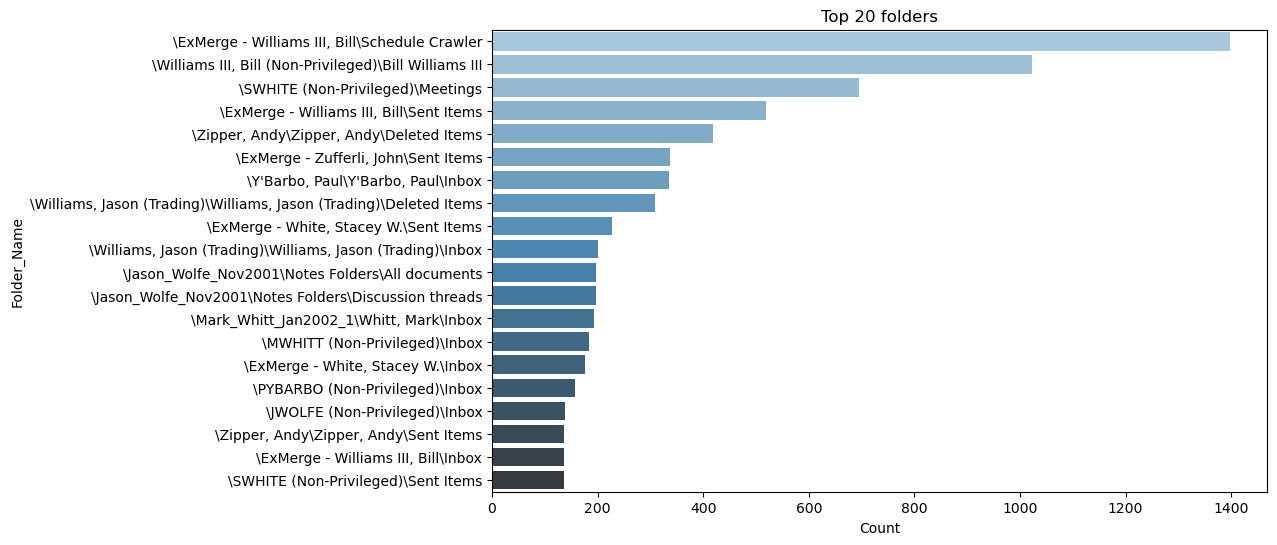

In [437]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='folder_name', data=unique_emails.iloc[:20, :], palette="Blues_d")
plt.title("Top 20 folders")
plt.xlabel("Count")
plt.ylabel("Folder_Name")
plt.show()

#### Top 20 highest email sender employeer (turns out we just have 7...)

In [439]:
top_20 = pd.DataFrame(df['employee'].value_counts()[:20])
top_20.reset_index(inplace=True)
top_20.columns = ["Employee_name", "Counts"]
top_20

,Employee_name,Counts
0,williams-w3,3440
1,white-s,1816
2,wolfe-j,1587
3,zipper-a,1563
4,ybarbo-p,1291
5,williams-j,1213
6,whitt-m,807
7,zufferli-j,557


/var/folders/48/skzz626x59b5wc8t7n4sj9tw0000gn/T/ipykernel_1921/1084256973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Employee_name", x="Counts", data=top_20, palette="Blues_d")


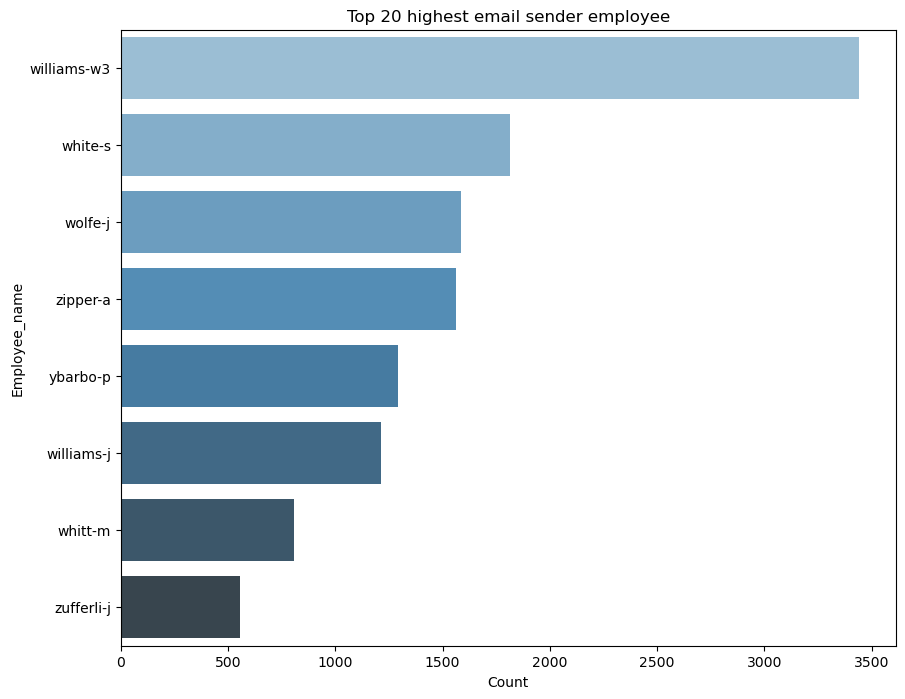

In [441]:
plt.figure(figsize=(10,8))

sns.barplot(y="Employee_name", x="Counts", data=top_20, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

### Data Cleaning and Transformation

In [443]:
import datetime
from dateutil import parser

#example
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
print(x.strftime("%d-%m-%Y %H:%M:%S"))

04-05-2001 13:51:00


In [445]:
def change_type(dates):
    column = []
    
    for date in dates:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

df['date'] = change_type(df['date'])
df.head(2)

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,white-s/discussion_threads/3.,Message-ID: <28919265.1075852042932.JavaMail.e...,29-11-2000 06:30:00,2000 10 Desk Analysis,\Sally_White_Nov2001\Notes Folders\Discussion ...,Amy Clemons,"Casey Evans, Jenny Latham, Stacey W White, Mon...",Here is the Desk Analysis - breakdown of 2000 ...,white-s
1,white-s/discussion_threads/30.,Message-ID: <28555804.1075852043600.JavaMail.e...,18-12-2000 10:15:00,Name Change-BP Energy Company,\Sally_White_Nov2001\Notes Folders\Discussion ...,Rhonda L Denton,Stacey W White,---------------------- Forwarded by Rhonda L D...,white-s


In [447]:
print(df['X-Folder'][0])

df['X-Folder'][0].split("\\")[-1]

\Sally_White_Nov2001\Notes Folders\Discussion threads


'Discussion threads'

In [449]:
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder'] = preprocess_folder(df['X-Folder'])
df.head(2)

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,white-s/discussion_threads/3.,Message-ID: <28919265.1075852042932.JavaMail.e...,29-11-2000 06:30:00,2000 10 Desk Analysis,discussion threads,Amy Clemons,"Casey Evans, Jenny Latham, Stacey W White, Mon...",Here is the Desk Analysis - breakdown of 2000 ...,white-s
1,white-s/discussion_threads/30.,Message-ID: <28555804.1075852043600.JavaMail.e...,18-12-2000 10:15:00,Name Change-BP Energy Company,discussion threads,Rhonda L Denton,Stacey W White,---------------------- Forwarded by Rhonda L D...,white-s


In [451]:
# count unique folders
print("Unique Foldes: ", len(df['X-Folder'].unique()))

# view some of them
df['X-Folder'].unique()[0:20]

Unique Foldes:  98


array(['discussion threads', 'doorstep', 'ena cal', 'flash', '200106',
       'genco_plant misc', 'global standards', 'inbox',
       'itinerary/receipt', 'itinerary_receipt', 'legal', 'meetings',
       'off-site', 'passwords', 'personal', 'personnel', 'training',
       'vacation', 'portcalc requests', 'press'], dtype=object)

### Replace empty missing values in subject with np.nan

In [453]:
def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan) 
        else:
            column.append(val)
    return column

In [455]:
df['subject'] = replace_empty_with_nan(df['subject'])
df['X-To'] = replace_empty_with_nan(df['X-To'])

In [457]:
df.isnull().sum()

file          0
message       0
date          0
subject     242
X-Folder      1
X-From        1
X-To        815
body          0
employee      0
dtype: int64

In [459]:
# calculate percentage of missing values
miss = df.isnull().sum()
miss = miss[miss>0]
miss = miss / df.shape[0]
miss

subject     0.019716
X-Folder    0.000081
X-From      0.000081
X-To        0.066401
dtype: float64

In [461]:
# drop missing value rows
df.dropna(axis=0, inplace=True)

In [463]:
df.isnull().sum(), df.shape

(file        0
 message     0
 date        0
 subject     0
 X-Folder    0
 X-From      0
 X-To        0
 body        0
 employee    0
 dtype: int64,
 (11220, 9))

In [465]:
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,body,employee
0,white-s/discussion_threads/3.,Message-ID: <28919265.1075852042932.JavaMail.e...,29-11-2000 06:30:00,2000 10 Desk Analysis,discussion threads,Amy Clemons,"Casey Evans, Jenny Latham, Stacey W White, Mon...",Here is the Desk Analysis - breakdown of 2000 ...,white-s
1,white-s/discussion_threads/30.,Message-ID: <28555804.1075852043600.JavaMail.e...,18-12-2000 10:15:00,Name Change-BP Energy Company,discussion threads,Rhonda L Denton,Stacey W White,---------------------- Forwarded by Rhonda L D...,white-s
2,white-s/discussion_threads/31.,Message-ID: <8369235.1075852043623.JavaMail.ev...,19-12-2000 06:40:00,2000 11 Flash Report,discussion threads,Amy Clemons,"Tracy Greene, Todd Warwick, Stacey W White, Je...",Here is the 2000 11 Final Flash Report. Let m...,white-s


#### Drop: file, message, date, X-Form, X-to, employee

In [467]:
cols_to_drop = ['file','message','date','X-From','X-To','employee']

In [469]:
df.drop(cols_to_drop, axis=1, inplace=True)

In [471]:
df.head()

,subject,X-Folder,body
0,2000 10 Desk Analysis,discussion threads,Here is the Desk Analysis - breakdown of 2000 ...
1,Name Change-BP Energy Company,discussion threads,---------------------- Forwarded by Rhonda L D...
2,2000 11 Flash Report,discussion threads,Here is the 2000 11 Final Flash Report. Let m...
3,Power LTD Rec,discussion threads,Attached is the November LTD reconciliation. ...
4,Revised LTD,discussion threads,Attached is a revised LTD file.\n


In [473]:
# save the data
df.to_csv("cleaned_data.csv", index=False)

In [488]:
df_copy = df

## II. Anwendung von Machine Learning Methoden und deren Interpretation

### Data Pre-processing

Eliminate folders with insufficient emails, as they will not contribute significantly to training our classifier. Additionally, folders with a very small number of emails are likely to have been created but remain unused.

In [478]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paulschumacher/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [480]:
import matplotlib.pyplot as plt
import re
import string
import time
pd.set_option('display.max_rows', 50)

from nltk.corpus import stopwords
stop = stopwords.words('english')

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

In [484]:
def remove_folders(emails, n):
    # returns the number of folders containing more than 'n' number of emails
    email_count = dict(df['X-Folder'].value_counts())
    small_folders = [key for key, val in email_count.items() if val<=n]
    emails = df.loc[~df['X-Folder'].isin(small_folders)]
    return emails

In [498]:
n = 50
df_copy = remove_folders(df_copy, n)

In [500]:
df_copy

,subject,X-Folder,body
0,2000 10 Desk Analysis,discussion threads,Here is the Desk Analysis - breakdown of 2000 ...
1,Name Change-BP Energy Company,discussion threads,---------------------- Forwarded by Rhonda L D...
2,2000 11 Flash Report,discussion threads,Here is the 2000 11 Final Flash Report. Let m...
3,Power LTD Rec,discussion threads,Attached is the November LTD reconciliation. ...
4,Revised LTD,discussion threads,Attached is a revised LTD file.\n
...,...,...,...
12269,Trade with John Lavorato,sent items,This is a trade with OIL-SPEC-HEDGE-NG (John L...
12270,Gas Hedges,sent items,Some of my position is with the Alberta Term b...
12271,RE: CONFIDENTIAL,sent items,2\n\n -----Original Message-----\nFrom: \tDouc...
12272,Calgary Analyst/Associate,sent items,Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...


In [502]:
print("Total folders: ", len(df_copy['X-Folder'].unique()))
print("df.shape: ", df_copy.shape)

Total folders:  17
df.shape:  (10085, 3)


#### Combine Subject and Body column

In [504]:
df_copy['text'] = df_copy['subject'] + " " + df_copy['body']

In [514]:
df_copy

,X-Folder,text
0,discussion threads,2000 10 Desk Analysis Here is the Desk Analysi...
1,discussion threads,Name Change-BP Energy Company ----------------...
2,discussion threads,2000 11 Flash Report Here is the 2000 11 Final...
3,discussion threads,Power LTD Rec Attached is the November LTD rec...
4,discussion threads,Revised LTD Attached is a revised LTD file.\n
...,...,...
12269,sent items,Trade with John Lavorato This is a trade with ...
12270,sent items,Gas Hedges Some of my position is with the Alb...
12271,sent items,RE: CONFIDENTIAL 2\n\n -----Original Message--...
12272,sent items,Calgary Analyst/Associate Analyst\t\t\t\t\tRan...


In [512]:
# drop the columns 'subject' and 'body'
df_copy.drop(['subject','body'], axis=1, inplace=True)

Lowercasing all words, Remove extra new lines, Remove extra tabs, punctuations, commas, Remove extra white spaces, Remove stopwords

In [516]:
def preprocess(x):
    # lowercasing all the words
    x = x.lower()
    
    # remove extra new lines
    x = re.sub(r'\n+', ' ', x)
    
    # removing (replacing with empty spaces actually) all the punctuations
    x = re.sub("["+string.punctuation+"]", " ", x)
    
    # remove extra white spaces
    x = re.sub(r'\s+', ' ', x)
    
    return x

In [518]:
start = time.time()
df_copy.loc[:,'text'] = df_copy.loc[:, 'text'].map(preprocess)

# remove stopwords
df_copy.loc[:, 'text'] = df_copy.loc[:, 'text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
end = time.time()
print("Execution time (sec): ",(end - start))

Execution time (sec):  2.028820037841797


In [520]:
df_copy

,X-Folder,text
0,discussion threads,2000 10 desk analysis desk analysis breakdown ...
1,discussion threads,name change bp energy company forwarded rhonda...
2,discussion threads,2000 11 flash report 2000 11 final flash repor...
3,discussion threads,power ltd rec attached november ltd reconcilia...
4,discussion threads,revised ltd attached revised ltd file
...,...,...
12269,sent items,trade john lavorato trade oil spec hedge ng jo...
12270,sent items,gas hedges position alberta term book send pos...
12271,sent items,confidential 2 original message doucet dawn se...
12272,sent items,calgary analyst associate analyst rank stephan...


Randomly select any 20 folders for categorization because of very high training time and computational cost

In [522]:
start = time.time()
folders_dict = dict(df_copy['X-Folder'].value_counts().sort_values()[50:70])
data = df_copy[df_copy['X-Folder'].isin(folders_dict.keys())]
end = time.time()
print("Execution time (sec): ",(end - start))

Execution time (sec):  0.003980875015258789


In [524]:
df_copy

,X-Folder,text
0,discussion threads,2000 10 desk analysis desk analysis breakdown ...
1,discussion threads,name change bp energy company forwarded rhonda...
2,discussion threads,2000 11 flash report 2000 11 final flash repor...
3,discussion threads,power ltd rec attached november ltd reconcilia...
4,discussion threads,revised ltd attached revised ltd file
...,...,...
12269,sent items,trade john lavorato trade oil spec hedge ng jo...
12270,sent items,gas hedges position alberta term book send pos...
12271,sent items,confidential 2 original message doucet dawn se...
12272,sent items,calgary analyst associate analyst rank stephan...


In [528]:
# check number of rows in the 'data' dataframe
print("Number of instances: ", df_copy.shape[0])
df_copy.to_csv('preprocessed.csv', index=False)

Number of instances:  10085


In [530]:
data = pd.read_csv("preprocessed.csv")

#### Encode class labels

In [532]:
data['X-Folder'].value_counts()

X-Folder
inbox                 2389
sent items            2258
schedule crawler      1396
deleted items         1327
bill williams iii     1004
discussion threads     489
all documents          473
06-saved               107
07-saved                93
10-saved                87
hr                      85
symesees                76
saved-04                65
05-saved                63
tradecounts             61
legal                   56
ecoelectrica            56
Name: count, dtype: int64

In [534]:
def label_encoder(data):
    class_le = LabelEncoder()
    # apply label encoder on the 'X-Folder' column
    y = class_le.fit_transform(data['X-Folder'])
    return y

In [536]:
y = label_encoder(data)
input_data = data['text']

### 1. Bag-of-Words

In [538]:
start = time.time()
vectorizer = CountVectorizer(min_df=5, max_features=5000)
X = vectorizer.fit_transform(input_data)
end = time.time()
print("Execution time (sec): ",(end - start))

Execution time (sec):  0.39790892601013184


In [540]:
start = time.time()
X = X.toarray()
print("X.shape: ",X.shape)
end = time.time()
print("Execution time (sec): ",(end - start))

X.shape:  (10085, 5000)
Execution time (sec):  0.09089398384094238


In [542]:
# create dataframe to store results
f1_data = {
    'Algorithm': ['Gaussian NB', 'Multinomial NB','Decision Tree','SVM','AdaBoost','ANN'],
    'BoW': ''
}
f1_df = pd.DataFrame(f1_data)

jaccard_data = {
    'Algorithm': ['Gaussian NB', 'Multinomial NB', 'Decision Tree','SVM','AdaBoost','ANN'],
    'BoW': ''
}
jacc_df = pd.DataFrame(jaccard_data)

acc_data = {
    'Algorithm': ['Gaussian NB', 'Multinomial NB','Decision Tree','SVM','AdaBoost','ANN'],
    'BoW': ''
}
acc_df = pd.DataFrame(acc_data)
acc_df

,Algorithm,BoW
0,Gaussian NB,
1,Multinomial NB,
2,Decision Tree,
3,SVM,
4,AdaBoost,
5,ANN,


#### Training and Evaluation

In [586]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
import time

models = [GaussianNB(), MultinomialNB(), DecisionTreeClassifier(), LinearSVC(),
          AdaBoostClassifier(n_estimators=5),  # Removed base_estimator
          MLPClassifier(hidden_layer_sizes=(10,))]

names = ["Gaussian NB", "Multinomial NB", "Decision Tree", "SVM", "AdaBoost", "ANN"]

jacc_scores = []
acc_scores = []
f1_scores = []
exec_times = []

for model, name in zip(models, names):
    print(name)
    start = time.time()
    scoring = {
        'accuracy': 'accuracy',
        'f1_macro': 'f1_macro',
        'jaccard_macro': 'jaccard_macro'
    }
    scores = cross_validate(model, X, y, cv=10, n_jobs=4, scoring=scoring)
    training_time = (time.time() - start)
    print("accuracy: ", scores['test_accuracy'].mean())
    print("f1_score: ", scores['test_f1_macro'].mean())
    print("Jaccard_index: ", scores['test_jaccard_macro'].mean())
    print("time (sec): ", training_time)
    print("\n")
    
    jacc_scores.append(scores['test_jaccard_macro'].mean())
    acc_scores.append(scores['test_accuracy'].mean())
    f1_scores.append(scores['test_f1_macro'].mean())
    exec_times.append(training_time)
    
acc_df['BoW'] = acc_scores
jacc_df['BoW'] = jacc_scores
f1_df['BoW'] = f1_scores
acc_df['time'] = exec_times
acc_df

Gaussian NB
accuracy:  0.4312191270627842
f1_score:  0.30230527758300213
Jaccard_index:  0.2228252155996596
time (sec):  2.876478910446167


Multinomial NB
accuracy:  0.5214520702565797
f1_score:  0.2512303539827826
Jaccard_index:  0.2000250616473755
time (sec):  0.8242282867431641


Decision Tree
accuracy:  0.4953756469551812
f1_score:  0.3284293715265694
Jaccard_index:  0.2537823978073632
time (sec):  16.66692805290222


SVM


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/

accuracy:  0.5303754306479778
f1_score:  0.3693644140569221
Jaccard_index:  0.295482450176062
time (sec):  2.2279491424560547


AdaBoost


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

accuracy:  0.37461546478518726
f1_score:  0.0839091351740837
Jaccard_index:  0.07444546974601957
time (sec):  7.089763879776001


ANN


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

accuracy:  0.5088610245882298
f1_score:  0.3520717236463631
Jaccard_index:  0.27943217404324994
time (sec):  312.115357875824




/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Algorithm,BoW,BoWBi,BoWBi_time,TfIdf,TfIdf_time,time
0,Gaussian NB,0.431219,0.431219,15.617995,0.431219,2.544232,2.876479
1,Multinomial NB,0.521452,0.521452,0.941100,0.521452,0.810741,0.824228
2,Decision Tree,0.495376,0.495179,16.916599,0.499045,16.481796,16.666928
3,SVM,0.530375,0.530375,2.238423,0.530375,2.189868,2.227949
4,AdaBoost,0.374615,0.374615,7.316228,0.374615,7.087134,7.089764
5,ANN,0.508861,0.509951,193.321660,0.509852,275.853327,312.115358


In [607]:
# save the results
acc_df.to_csv("accuracy.csv", index=False)
f1_df.to_csv("f1_score.csv", index=False)
jacc_df.to_csv("jacc_score.csv", index=False)

### 2. Bag-of-Words Bigram

In [550]:
start = time.time()
vectorizer = CountVectorizer(min_df=5, max_features=5000, ngram_range=(2,2))
X = vectorizer.fit_transform(input_data)

X = X.toarray()
print("X.shape: ",X.shape)

end = time.time()
print("Execution time (sec): ",(end - start))

X.shape:  (10085, 5000)
Execution time (sec):  1.2685470581054688


In [570]:
models = [GaussianNB(), MultinomialNB(), DecisionTreeClassifier(), LinearSVC(),
          AdaBoostClassifier(n_estimators=5),  # No base_estimator here
          MLPClassifier(hidden_layer_sizes=(10,))]

names = ["Gaussian NB", "Multinomial NB", "Decision Tree", "SVM", "AdaBoost", "ANN"]

jacc_scores = []
acc_scores = []
f1_scores = []
exec_times = []

for model, name in zip(models, names):
    print(name)
    start = time.time()
    scoring = {
        'accuracy': 'accuracy',
        'f1_macro': 'f1_macro',
        'jaccard_macro': 'jaccard_macro'
    }
    scores = cross_validate(model, X, y, cv=10, n_jobs=4, scoring=scoring)
    training_time = (time.time() - start)
    print("accuracy: ", scores['test_accuracy'].mean())
    print("f1_score: ", scores['test_f1_macro'].mean())
    print("Jaccard_index: ", scores['test_jaccard_macro'].mean())
    print("time (sec): ", training_time)
    print("\n")
    
    jacc_scores.append(scores['test_jaccard_macro'].mean())
    acc_scores.append(scores['test_accuracy'].mean())
    f1_scores.append(scores['test_f1_macro'].mean())
    exec_times.append(training_time)
    
acc_df['BoWBi'] = acc_scores
jacc_df['BoWBi'] = jacc_scores
f1_df['BoWBi'] = f1_scores
acc_df['BoWBi_time'] = exec_times
acc_df


Gaussian NB
accuracy:  0.4312191270627842
f1_score:  0.30230527758300213
Jaccard_index:  0.2228252155996596
time (sec):  15.617995023727417


Multinomial NB
accuracy:  0.5214520702565797
f1_score:  0.2512303539827826
Jaccard_index:  0.2000250616473755
time (sec):  0.9411001205444336


Decision Tree
accuracy:  0.4951785124356977
f1_score:  0.3255488940709098
Jaccard_index:  0.25198063371428203
time (sec):  16.916598796844482


SVM


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/

accuracy:  0.5303754306479778
f1_score:  0.3693644140569221
Jaccard_index:  0.295482450176062
time (sec):  2.2384231090545654


AdaBoost


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

accuracy:  0.37461546478518726
f1_score:  0.0839091351740837
Jaccard_index:  0.07444546974601957
time (sec):  7.316228151321411


ANN


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

accuracy:  0.5099509179291142
f1_score:  0.3607363430863755
Jaccard_index:  0.28704007750403915
time (sec):  193.32166004180908




/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Algorithm,BoW,BoWBi,BoWBi_time
0,Gaussian NB,,0.431219,15.617995
1,Multinomial NB,,0.521452,0.941100
2,Decision Tree,,0.495179,16.916599
3,SVM,,0.530375,2.238423
4,AdaBoost,,0.374615,7.316228
5,ANN,,0.509951,193.321660


In [574]:
# save the results
acc_df.to_csv("accuracy.csv", index=False)
f1_df.to_csv("f1_score.csv", index=False)
jacc_df.to_csv("jacc_score.csv", index=False)

### 3. Tf-Idf (Term Frequency - Inverse Document Frequency)

In [554]:
start = time.time()
vectorizer = TfidfVectorizer(min_df=5, max_features=5000)
X = vectorizer.fit_transform(input_data)

X = X.toarray()
print("X.shape: ",X.shape)

end = time.time()
print("Execution time (sec): ",(end - start))

X.shape:  (10085, 5000)
Execution time (sec):  0.4496009349822998


#### Training and Evaluation

In [576]:
models = [GaussianNB(), MultinomialNB(), DecisionTreeClassifier(), LinearSVC(),
          AdaBoostClassifier(n_estimators=5),  # No base_estimator here
          MLPClassifier(hidden_layer_sizes=(10,))]

names = ["Gaussian NB", "Multinomial NB", "Decision Tree", "SVM", "AdaBoost", "ANN"]

jacc_scores = []
acc_scores = []
f1_scores = []
exec_times = []

for model, name in zip(models, names):
    print(name)
    start = time.time()
    scoring = {
        'accuracy': 'accuracy',
        'f1_macro': 'f1_macro',
        'jaccard_macro': 'jaccard_macro'
    }
    scores = cross_validate(model, X, y, cv=10, n_jobs=4, scoring=scoring)
    training_time = (time.time() - start)
    print("accuracy: ", scores['test_accuracy'].mean())
    print("f1_score: ", scores['test_f1_macro'].mean())
    print("Jaccard_index: ", scores['test_jaccard_macro'].mean())
    print("time (sec): ", training_time)
    print("\n")
    
    jacc_scores.append(scores['test_jaccard_macro'].mean())
    acc_scores.append(scores['test_accuracy'].mean())
    f1_scores.append(scores['test_f1_macro'].mean())
    exec_times.append(training_time)

# Update DataFrames with results
acc_df['TfIdf'] = acc_scores
jacc_df['TfIdf'] = jacc_scores
f1_df['TfIdf'] = f1_scores
acc_df['TfIdf_time'] = exec_times
acc_df

Gaussian NB
accuracy:  0.4312191270627842
f1_score:  0.30230527758300213
Jaccard_index:  0.2228252155996596
time (sec):  2.544232130050659


Multinomial NB
accuracy:  0.5214520702565797
f1_score:  0.2512303539827826
Jaccard_index:  0.2000250616473755
time (sec):  0.8107409477233887


Decision Tree
accuracy:  0.49904490537543056
f1_score:  0.3263219786522654
Jaccard_index:  0.25456061328442436
time (sec):  16.481796264648438


SVM


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/

accuracy:  0.5303754306479778
f1_score:  0.3693644140569221
Jaccard_index:  0.295482450176062
time (sec):  2.1898679733276367


AdaBoost


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

accuracy:  0.37461546478518726
f1_score:  0.0839091351740837
Jaccard_index:  0.07444546974601957
time (sec):  7.087133884429932


ANN


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

accuracy:  0.5098515149369957
f1_score:  0.359208927787868
Jaccard_index:  0.28745119120780616
time (sec):  275.8533272743225




/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Algorithm,BoW,BoWBi,BoWBi_time,TfIdf,TfIdf_time
0,Gaussian NB,,0.431219,15.617995,0.431219,2.544232
1,Multinomial NB,,0.521452,0.941100,0.521452,0.810741
2,Decision Tree,,0.495179,16.916599,0.499045,16.481796
3,SVM,,0.530375,2.238423,0.530375,2.189868
4,AdaBoost,,0.374615,7.316228,0.374615,7.087134
5,ANN,,0.509951,193.321660,0.509852,275.853327


In [582]:
# save the results
acc_df.to_csv("accuracy.csv", index=False)
f1_df.to_csv("f1_score.csv", index=False)
jacc_df.to_csv("jacc_score.csv", index=False)

In [609]:
jacc_df

,Algorithm,BoW,BoWBi,TfIdf
0,Gaussian NB,0.222825,0.222825,0.222825
1,Multinomial NB,0.200025,0.200025,0.200025
2,Decision Tree,0.253782,0.251981,0.254561
3,SVM,0.295482,0.295482,0.295482
4,AdaBoost,0.074445,0.074445,0.074445
5,ANN,0.279432,0.287040,0.287451


### Interpretation of the results

Die drei genutzten Text Strukturieungsmodelle ergeben folgende Resultate für die jeweiligen Machine Learning Modelle:

1. **Gaussian Naive Bayes (NB)**:
   - **Accuracy**: 43.12% (BoW), 43.12% (BoWBi), 43.12% (TfIdf)
   - **Time**: 2.88 seconds (BoW), 2.54 seconds (TfIdf)
   - **Interpretation**:Der Gaussian Naive Bayes-Klassifikator erzielt eine konstante Leistung über verschiedene Features hinweg mit einer moderaten Genauigkeit, jedoch ist er im Vergleich zu anderen Algorithmen ist er relativ schnell.

2. **Multinomial Naive Bayes (NB)**:
   - **Accuracy**: 52.15% (BoW), 52.15% (BoWBi), 52.15% (TfIdf)
   - **Time**: 0.82 seconds (BoW), 0.81 seconds (TfIdf)
   - **Interpretation**: Der Multinomial Naive Bayes-Klassifikator erreicht die höchste Genauigkeit unter den getesteten Algorithmen. Er ist auch am schnellsten in Bezug auf die Zeit.

3. **Decision Tree**:
   - **Accuracy**: 49.54% (BoW), 49.52% (BoWBi), 49.90% (TfIdf)
   - **Time**: 16.67 seconds (BoW), 16.48 seconds (TfIdf)
   - **Interpretation**: Der Entscheidungsbaum-Algorithmus hat eine solide Genauigkeit, ist jedoch in Bezug auf die Trainingszeit ziemlich langsam. Die Genauigkeit verbessert sich etwas mit TfIdf, aber die Leistung in Bezug auf die Zeit ist weiterhin relativ hoch.

4. **Support Vector Machine (SVM)**:
   - **Accuracy**: 53.04% (BoW), 53.04% (BoWBi), 53.04% (TfIdf)
   - **Time**: 2.23 seconds (BoW), 2.19 seconds (TfIdf)
   - **Interpretation**: SVM bietet die höchste Genauigkeit unter den getesteten Klassifikatoren, und seine Zeit ist besser als die von Decision Trees und ANN. Das deutet darauf hin, dass SVM effektiv und relativ effizient für dieses Dataset ist.

5. **AdaBoost**:
   - **Accuracy**: 37.46% (BoW), 37.46% (BoWBi), 37.46% (TfIdf)
   - **Time**: 7.09 seconds (BoW), 7.09 seconds (TfIdf)
   - **Interpretation**: AdaBoost weist die niedrigste Genauigkeit unter den Algorithmen auf und ist moderat schnell. Seine Leistung ist im Vergleich zu anderen daher weniger zufriedenstellend.

6. **Artificial Neural Network (ANN)**:
   - **Accuracy**: 50.89% (BoW), 50.99% (BoWBi), 50.99% (TfIdf)
   - **Time**: 312.12 seconds (BoW), 275.85 seconds (TfIdf)
   - **Interpretation**: ANN bietet eine ebenfalls solide Genauigkeit, erfordert jedoch erheblich mehr Zeit im Vergleich zu anderen Methoden. Das deutet darauf hin, dass es möglicherweise ein Overfitting vorherrscht oder der Trainingsprozess sehr komplex ist.

**Zusammenfassung**:
SVM erzielt die beste Genauigkeit mit 53,04%. Die beste Effizienz weist der Multinomial Naive Bayes-Klassifikator auf, der am schnellsten ist und eine Genauigkeit von 52,15% erreicht. AdaBoost hat die schlechteste Genauigkeit mit 37,46%. Die längste Trainingszeit benötigt das ANN, das über 275 Sekunden dauert.

Basierend auf diesen Ergebnissen scheint SVM die ausgewogenste Option in Bezug auf Genauigkeit und Zeit-Effizienz zu sein, während das ANN, trotz guter Genauigkeit, deutlich langsamer ist.

### Limitations of the models

Insgesamt sind die Zahlen für alle Modelle nicht sonderlich hoch. Aufgrund des Zeitlimits der Aufgabe konnte ich weitere Methoden wie beispielsweise Gradient Boosting Machines (GBM), Techniken wie XGBoost oder LightGBM, Random Forests, k-Nearest Neighbors (k-NN), Extreme Gradient Boosting (XGBoost), LightGBM und CatBoost nicht zusätzlich testen. Mögliche Fehlerquellen sind die zufällige Auswahl von 20 Ordnern (vielleicht wäre es besser gewesen die top 20 Folder zu nehmen), eventuelle Fehler in der Datenverarbeitung oder ein mangelhafter Datensatz.